In [4]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt
%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

plt.rcParams['axes.unicode_minus']=False

from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import time

In [5]:
tmp = "https://search.naver.com/search.naver?where=kin"
html = tmp + "&sm=tab_jum&query={key_word}&start={page}"
response = urlopen(html.format(page=1, key_word=urllib.parse.quote('크리스마스 연인이벤트')))
soup = BeautifulSoup(response, "html.parser")
tmp = soup.find_all('dl')

In [8]:
tmp_list = []
for line in tmp :
    tmp_list.append(line.text)

tmp_list

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 '  질문  크리스마스 연인이벤트좀 추천해주세요   2013.12.23.   상대방은 23살 여자구요 이브날이랑 크리스마스날 일을해서 밤에 잠깐 만날꺼같은데요. 간단한게 할수있는 이벤트 부탁드립니다. 사귄지는 얼마안되서 이벤트...   답변 크리스마스까지 시간이 그닥 오래남지 않으셔서 이 이벤트르 하실 수있을까 모르겠찌만 추천을 해드리자면 라디오 이벤트를 추천을 해드리구요~ 직접쓰신 편지를 이벤트...    닉네임flem****   ',
 '  질문  크리스마스 이브   5일 전   크리스마스 이브에 연인들 만나죠? 그날은 호텔도 만석인데 어디서 놀아용   답변 연인들에게 크리스마스는 평소 하지 않았던 특별한 추억을 남기고 싶은 날이... [러브액츄얼리] 와 [이프온리]는 프로포즈 이벤트도 전화로 받고 있어 연인들이 아름답고...    닉네임pbar****   ',
 '  질문  20대 여자친구 크리스마스 선물   2일 전   사귄지 2년차된 20대 커플이에요 여자친구 크리스마스 선물 찾고있는데... 반지 화장품 향수 이런거는 이미 다줬어요 여자친구 크리스마스 선물로 줄만한거 뭐가 좋을까요 ㅠ   답변 연인들에게 크리스마스는 평소 하지 않았던 특별한 추억을 남기고 싶은 날이... [러브액츄얼리] 와 [이프온리]는 프로포즈 이벤트도 전화로 받고 있어 연인들이 아름답고...    닉네임pbar****   ',
 '  질문  10대 남자친구 크리스마스 선물   3일 전   곧 다가오는 크리스마스 선물 미리 알아보려구 해요~! 인터넷에 나오는 추천 선물은 다 비싸더라구요.. 중학생이 살 수 있는 선물들좀 추천해주세요. 자유럽게요~!ㅠ 아니면...   답변 연인들에게 크리스마스는 평소

In [10]:
from tqdm import tqdm_notebook

present_christmas_text = []

for n in tqdm_notebook(range(1,10000,10)):
    response = urlopen(html.format(page=n, key_word=urllib.parse.quote("크리스마스 연인이벤트")))
    
    soup = BeautifulSoup(response, "html.parser")
    
    tmp = soup.find_all('dl')
    
    for line in tmp :
        present_christmas_text.append(line.text)
    
    time.sleep(0.5)


In [1]:
import nltk
from konlpy.tag import Twitter; t = Twitter()

C:\Users\small\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
C:\Users\small\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [22]:
present_text = ''

for each_line in present_christmas_text[:10000]:
    present_text = present_text + each_line + '\n'

In [23]:
tokens_ko = t.morphs(present_text)
tokens_ko

['기본',
 '검색',
 '입력',
 '한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함',
 '된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치',
 '하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함',
 '하는',
 '단어',
 '(+)',
 '제외',
 '하는',
 '단어',
 '(-)',
 '기',
 '본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이고자',
 '할',
 '때',
 '사용',
 '합니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력',
 '하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분',
 '해서',
 '입력',
 '하세요',
 '.',
 '질문',
 '크리스마스',
 '연인',
 '이벤트',
 '좀',
 '추천',
 '해주세요',
 '2013.12',
 '.',
 '23',
 '.',
 '상대방',
 '은',
 '23',
 '살',
 '여',
 '자구',
 '요',
 '이브',
 '날',
 '이랑',
 '크리스마스',
 '날',
 '일',
 '을해',
 '서',
 '밤',
 '에',
 '잠깐',
 '만날꺼',
 '같은데요',
 '.',
 '간단한게',
 '할수있는',
 '이벤트',
 '부탁드립니다',
 '.',
 '사귄지는',
 '얼마',
 '안되서',
 '이벤트',
 '...',
 '답변',
 '크리스마스',
 '까지',
 '시간',
 '이',
 '그닥',
 '오래',
 '남지',
 '않으셔서',
 '이',
 '이벤트',
 '르',
 '하실',
 '수',
 '있을까',
 '모르겠',
 '찌',
 '만',
 '추천',
 '을',
 '해드리자면',
 '라디오',
 '이벤트',
 '를',
 '추천',
 '을',
 '해드리구요',
 '~',
 '직접',
 '쓰신',
 '편지',
 '를',
 '이벤트',
 '...',
 '닉네임',
 'flem',
 '****',


In [25]:
ko = nltk.Text(tokens_ko, name='크리스마스 연인이벤트')
print(len(ko.tokens))
print(len(set(ko.tokens)))

654939
251


In [26]:
ko = nltk.Text(tokens_ko, name='크리스마스 연인이벤트')
ko.vocab().most_common(100)

[('크리스마스', 27495),
 ('...', 19996),
 ('이', 18330),
 ('는', 18329),
 ('들', 16662),
 ('선물', 16660),
 ('연인', 15830),
 ('[', 14996),
 (']', 14996),
 ('을', 13331),
 ('이벤트', 12502),
 ('로', 10831),
 ('날', 9166),
 ('도', 9165),
 ('질문', 8332),
 ('답변', 8332),
 ('닉네임', 8332),
 ('****', 8332),
 ('.', 7503),
 ('전', 7498),
 ('에게', 7498),
 ('평소', 7498),
 ('하지', 7498),
 ('않았던', 7498),
 ('특별한', 7498),
 ('추억', 7498),
 ('남기고', 7498),
 ('싶은', 7498),
 ('러브액츄얼리', 7498),
 ('와', 7498),
 ('이프', 7498),
 ('온리', 7498),
 ('프로포즈', 7498),
 ('전화', 7498),
 ('받고', 7498),
 ('있어', 7498),
 ('아름답고', 7498),
 ('pbar', 7498),
 ('추천', 6667),
 ('요', 4999),
 ('단어', 4170),
 ('이랑', 4166),
 ('3일', 4165),
 ('검색', 3336),
 ('를', 3336),
 ('때', 3334),
 ('에', 3334),
 ('?', 3333),
 ('대', 3332),
 ('입력', 2502),
 ('하는', 2502),
 ('이브', 2502),
 ('은', 2501),
 ('가', 2500),
 ('좀', 2500),
 ('살', 2500),
 ('수', 2500),
 ('여자친구', 2499),
 ('2일', 2499),
 ('뭐', 2499),
 ('남자친구', 2499),
 ('곧', 2499),
 ('..', 2499),
 ('포함', 1668),
 ('의', 1668),
 ('하실', 1668),

In [27]:
stop_words = ['...','이','는','들','연인','[',']','을','로','날','도','질문','답변','닉네임',
'****','.','전','에게','평소', '하지','않았던','특별한','추억','남기고','싶은','추억','남기고','싶은','러브액츄얼리','와','이프',
'온리','전화','받고','있어','아름답고','pbar','추천','요','단어','이랑','3일','검색','를','때','에','?','대','입력',
'하는','이브','은','가','좀','살', '수','2일','뭐','곧','..','포함','의','하실','23','한','해주세요','여',
'만','20','거', '다', 'ㅠ', '해', '~!', '있는','....','있으면','생일','남친','하져',',,?', '기본','하나','이상','된','문서','상세',
'정확히','일치','/','문장','("','")','반드시','(+)','제외','(-)','기','본','결과','범위','줄이고자','할','사용','합니다','여러',
'개','쉼표','(,)','구분','해서','하세요','2013.12','상대방','자구','일','을해','서','밤','잠깐','만날꺼','같은데요','간단한게',
'할수있는','부탁드립니다','사귄지는','얼마','안되서','까지','시간','그닥','오래','남지','않으셔서','르', '있을까','모르겠','찌',
'해드리자면','해드리구요','~','직접','쓰신', 'flem','5일','연','인들','만나죠','그날', '인데','어디서','놀아용','사귄지','2년',
'차된','커플','이에요','찾고있는데','이런','이미','줬어요','줄','좋을까요','10','다가오는','미리','알아보려구','인터넷','나오는',
'비싸더라구요','중학생','자','유럽','게','아니면','사야','되는데','!!','혹시','홍대','에서','곳']

tokens_ko = [each_word for each_word in tokens_ko 
                                                         if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(50)

[('크리스마스', 27495),
 ('선물', 16660),
 ('이벤트', 12502),
 ('프로포즈', 7498),
 ('여자친구', 2499),
 ('남자친구', 2499),
 ('라디오', 834),
 ('편지', 834),
 ('호텔', 834),
 ('만석', 834),
 ('반지', 833),
 ('화장품', 833),
 ('향수', 833),
 ('해주실수', 833),
 ('있어요', 833),
 ('초', 833),
 ('4', 833),
 ('참고', 833),
 ('게임', 833),
 ('않', 833),
 ('잖아여', 833),
 ('근데', 833),
 ('또', 833),
 ('이기도', 833),
 ('하구', 833),
 ('그래서', 833),
 ('말인데여', 833),
 ('ㅠㅠ', 833),
 ('가격', 833),
 ('중', 833),
 ('1', 833),
 ('임', 833),
 ('미다', 833),
 ('친구', 833),
 ('이번', 833),
 ('처음', 833),
 ('으로', 833),
 ('이상한', 833),
 ('해주기로', 833),
 ('했는데요', 833),
 ('어떤', 833),
 ('해줘야', 833),
 ('기발하고', 833),
 ('재밌을까요', 833),
 ('??', 833),
 ('어렵게', 833),
 ('구', 833),
 ('할수', 833),
 ('잇는', 833),
 ('그런건', 833)]

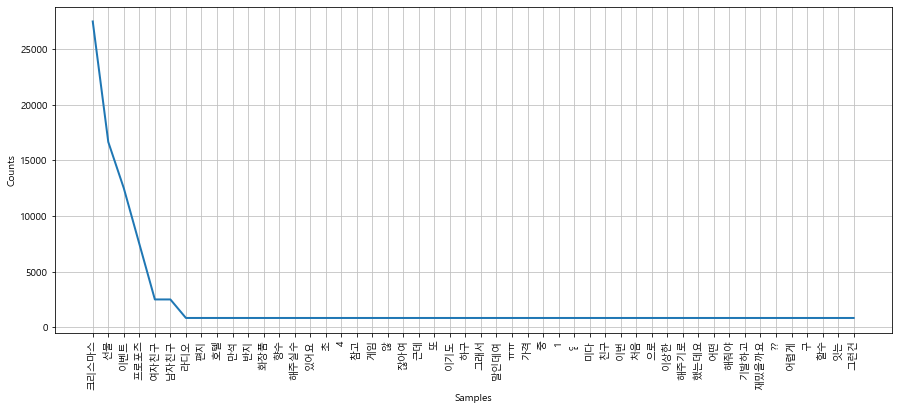

In [32]:
plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()

In [30]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

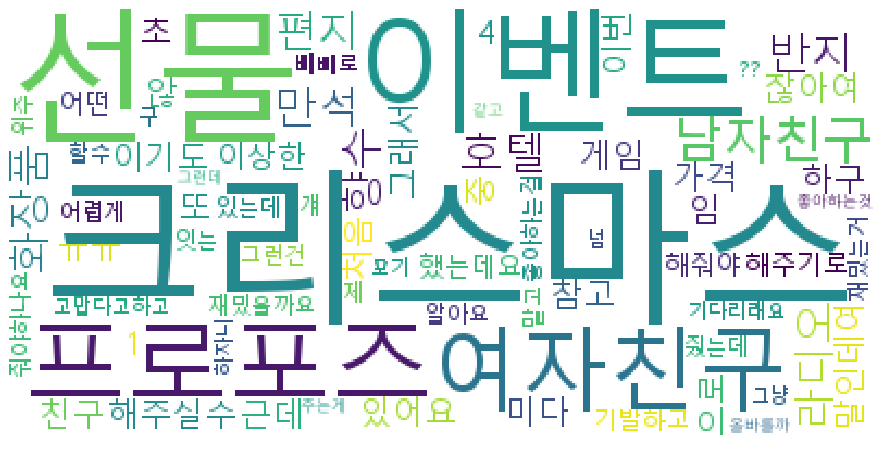

In [33]:
data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [34]:
mask = np.array(Image.open('../data/Tree.jpg'))

from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)

In [36]:
data = ko.vocab().most_common(200)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

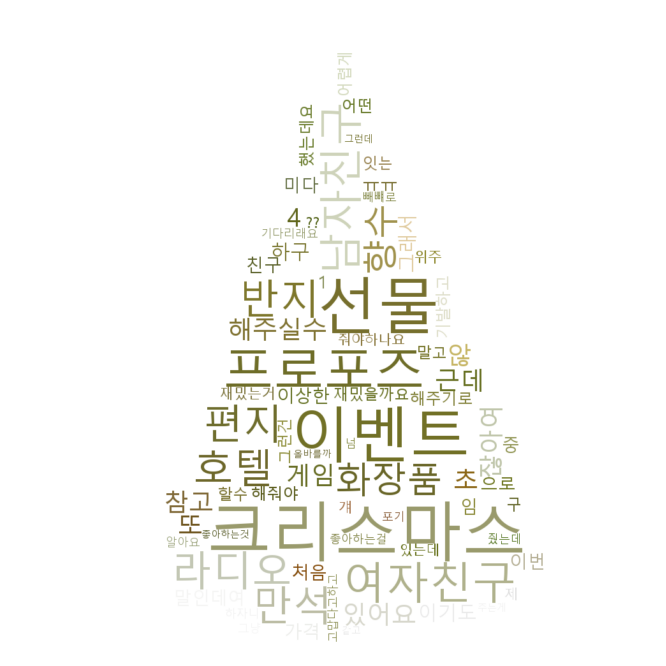

In [40]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.savefig("christmasTree1.png")
plt.show()